<a href="https://colab.research.google.com/github/praaatik/pytorch/blob/main/food_101_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import requests
import zipfile
from pathlib import Path
import os
import random
from PIL import Image
from typing import Tuple, Dict, List

import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.xkcd()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [3]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"Directories -> {len(dirnames)}, Images -> {len(filenames)} in {dirpath}.")

In [4]:
walk_through_dir(image_path)

Directories -> 2, Images -> 0 in data/pizza_steak_sushi.
Directories -> 3, Images -> 0 in data/pizza_steak_sushi/test.
Directories -> 0, Images -> 19 in data/pizza_steak_sushi/test/steak.
Directories -> 0, Images -> 31 in data/pizza_steak_sushi/test/sushi.
Directories -> 0, Images -> 25 in data/pizza_steak_sushi/test/pizza.
Directories -> 3, Images -> 0 in data/pizza_steak_sushi/train.
Directories -> 0, Images -> 75 in data/pizza_steak_sushi/train/steak.
Directories -> 0, Images -> 72 in data/pizza_steak_sushi/train/sushi.
Directories -> 0, Images -> 78 in data/pizza_steak_sushi/train/pizza.


In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [6]:
print(train_dir, test_dir, sep="\n")

data/pizza_steak_sushi/train
data/pizza_steak_sushi/test


Random image path: data/pizza_steak_sushi/train/pizza/2428085.jpg
Image class: pizza
Image height: 384
Image width: 512


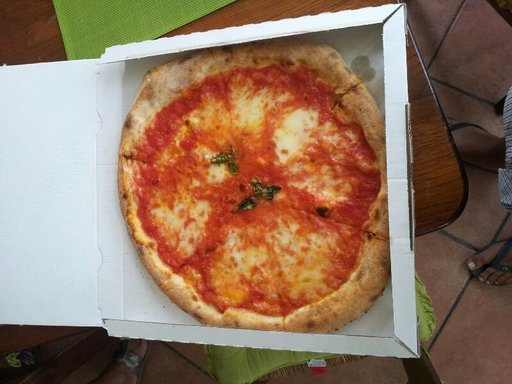

In [7]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

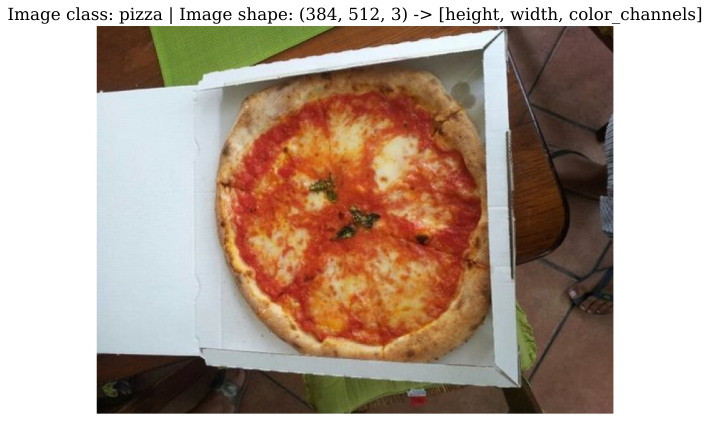

In [8]:
img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [9]:
img_as_array.shape

(384, 512, 3)

In [10]:
data_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor()
])

[PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg')]


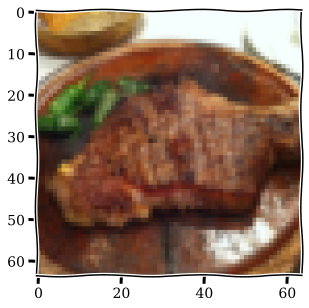

In [11]:
random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.sample(image_path_list, k=1)
print(random_image_path)

with Image.open('data/pizza_steak_sushi/train/steak/1382427.jpg') as f:
  f1 = data_transforms(f).permute(1, 2, 0)
  plt.imshow(f1)
  plt.show()

In [12]:
random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.sample(image_path_list, k=1)
print(random_image_path)

with Image.open('data/pizza_steak_sushi/train/steak/1382427.jpg') as f:
  t = data_transforms(f)
  print(t.size())
  print(f.size)

  # plt.imshow(f)
  # plt.show()

[PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg')]
torch.Size([3, 64, 64])
(512, 512)


In [13]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)

      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis("off")

      transformed_image = data_transforms(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.size()}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

# plot_transformed_images(image)

In [14]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list)

[PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/162

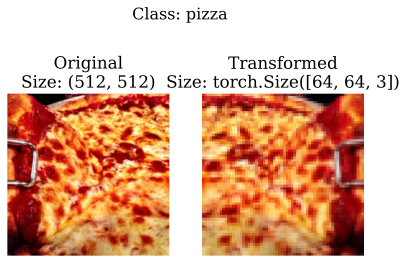

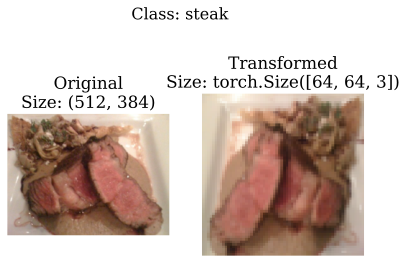

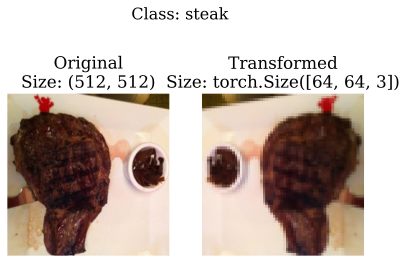

In [15]:
plot_transformed_images(image_paths=image_path_list, transform=data_transforms,n=3)

In [19]:
target_directory = train_dir
print(target_directory)

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
print(class_names_found)

data/pizza_steak_sushi/train
['pizza', 'steak', 'sushi']


In [23]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Could not find any classes in {directory}.")

  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [24]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Creating custom `Dataset` replicating the `ImageFolder`

- Subclass the `torch.utils.Dataset`
- Initialize the subclass with the target directory and the transforms.
- The class must have the below attributes,
	- `paths`
	- `transform`
	 - `classes`
	  - `classes_to_idx`
- Create function `load_images()` to return an image.
- Overwrite `__len__()` to return the length of the dataset (as per documentation).
- Overwrite `__getitem__()` to return a sample from the dataset when passed an index(as per documentation).